In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

In [201]:
dfs = []
for fn in glob('results/arith/*csv'):
    print(fn)
    ambig = int(fn.split('-')[1].split('.')[0])
    df = pd.read_csv(fn, header=None, skiprows=1, names=['name', 'avg', 'tot', 'ct', 'cores'])
    df['ambig'] = pd.Series([ambig]*len(df))
    dfs.append(df)
arith_df = pd.concat(dfs, ignore_index=True)

results/arith/arith-9.csv
results/arith/arith-8.csv
results/arith/arith-3.csv
results/arith/arith-2.csv
results/arith/arith-11.csv
results/arith/arith-10.csv
results/arith/arith-5.csv
results/arith/arith-4.csv
results/arith/arith-6.csv
results/arith/arith-7.csv


In [230]:
from matplotlib.ticker import MaxNLocator

def speedup_plot(df, out_fn):
    eserial = min(df[df['name'] == 'earley_serial']['avg'])
    lserial = min(df[df['name'] == 'late_serial']['avg'])
    par_x = df[df['name'] == 'late_parallel']['cores'] 
    par_y = df[df['name'] == 'late_parallel']['avg'].as_matrix()

    fig, ax1 = plt.subplots()
    ax1.set_title('Speedup Over Serial')

    ax1.set_xlabel('# of threads')
    ax1.set_xticks(np.arange(2, 22, 2))

    ax1.axvline(10, linestyle='dashed', color='purple')
    ax1.text(10.4, 0.5,'# of cores', color='purple')

    ax1.plot(par_x, lserial / par_y)
    ax1.set_ylabel('Speedup over serial Late algorithm')

    ax2 = ax1.twinx()
    ax2.plot(par_x, eserial / par_y, linestyle='None')
    ax2.set_ylabel('Speedup over serial Earley algorithm')
    
    fig.canvas.draw()
    ax1.set_yticklabels([l.get_text()+'x' for l in ax1.get_yticklabels()])
    ax2.set_yticklabels([l.get_text()+'x' for l in ax2.get_yticklabels()])

    plt.savefig(out_fn, dpi=300)
    plt.show()

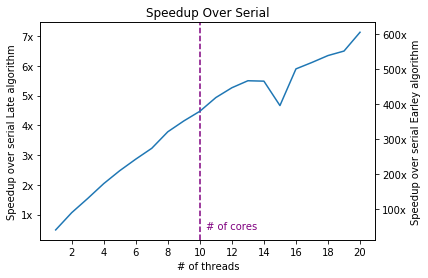

In [231]:
speedup_plot(arith_df[arith_df['ambig'] == 10], '../earley_paper/figures/arith_scaling.png')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


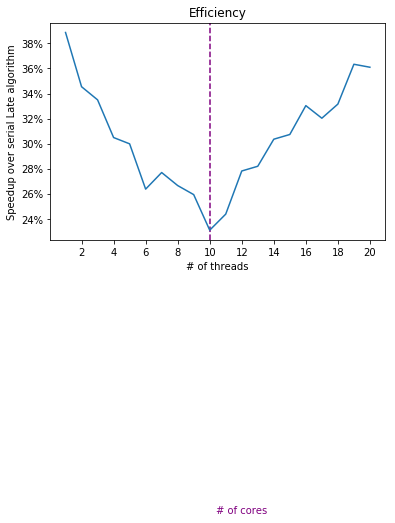

In [192]:
from matplotlib.ticker import MaxNLocator

ambig = 5
df1 = df[df['ambig'] == ambig]
eserial = min(df1[df['name'] == 'earley_serial']['avg'])
lserial = min(df1[df['name'] == 'late_serial']['avg'])
par_x = df1[df['name'] == 'late_parallel']['cores'] 
par_y = df1[df['name'] == 'late_parallel']['avg'].as_matrix()

fig, ax1 = plt.subplots()
ax1.set_title('Efficiency')

ax1.set_xlabel('# of threads')
ax1.set_xticks(np.arange(2, 22, 2))

ax1.axvline(10, linestyle='dashed', color='purple')
ax1.text(10.4, 0.5,'# of cores', color='purple')

ax1.plot(par_x, [lserial / ((min(n + 1, 10)) * tn) * 100 for (n, tn) in enumerate(par_y)])
ax1.set_ylabel('Speedup over serial Late algorithm')

fig.canvas.draw()
ax1.set_yticklabels([l.get_text()+'%' for l in ax1.get_yticklabels()])

#plt.savefig('../earley_paper/figures/strong_scaling.png', dpi=300)
plt.show()

In [199]:
dfs = []
for fn in glob('results/arith_per_item/*csv'):
    ambig = int(fn.split('-')[1].split('.')[0])
    df = pd.read_csv(fn, header=None, skiprows=1, names=['name', 'avg', 'tot', 'ct', 'cores', 'size'])
    df['ambig'] = pd.Series([ambig]*len(df))
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df = df.set_index('ambig')
df = df.sort_index()
df

,name,avg,tot,ct,cores,size
ambig,,,,,,
1,late_parallel,0.000058,0.018273,100,20,95
2,late_parallel,0.000136,0.020594,100,20,214
3,late_parallel,0.000215,0.029552,100,20,476
4,late_parallel,0.000363,0.044433,100,20,1048
5,late_parallel,0.000708,0.083194,100,20,2288
6,late_parallel,0.001429,0.163224,100,20,4960
7,late_parallel,0.003018,0.325112,100,20,10688
8,late_parallel,0.006352,0.647997,100,20,22912
9,late_parallel,0.013176,1.343540,100,20,48896


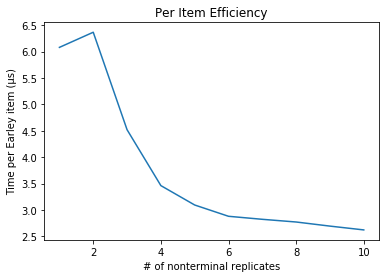

In [200]:
x = range(1, len(df)+1)
y = (df['avg'] / df['size'] * 10 * 1000000).as_matrix()

fig, ax = plt.subplots()
ax.set_title('Per Item Efficiency')
ax.set_ylabel('Time per Earley item (μs)')
ax.set_xlabel('# of nonterminal replicates')
plt.plot(x, y)
plt.savefig('../earley_paper/figures/per_item_time.png', dpi=300)
plt.show()

In [232]:
java_df = pd.read_csv('results/java.csv', header=None, skiprows=1, names=['name', 'avg', 'tot', 'ct', 'cores', 'size'])
java_df

,name,avg,tot,ct,cores,size
0,late_parallel,0.024628,2.952660,100,1,58002
1,late_parallel,0.017575,1.814980,100,2,58002
2,late_parallel,0.015110,1.555690,100,3,58002
3,late_parallel,0.014401,1.482450,100,4,58002
4,late_parallel,0.013766,1.401630,100,5,58002
5,late_parallel,0.012980,1.309700,100,6,58002
6,late_parallel,0.012143,1.226780,100,7,58002
7,late_parallel,0.011932,1.221800,100,8,58002
8,late_parallel,0.011762,1.186080,100,9,58002
9,late_parallel,0.011420,1.164330,100,10,58002


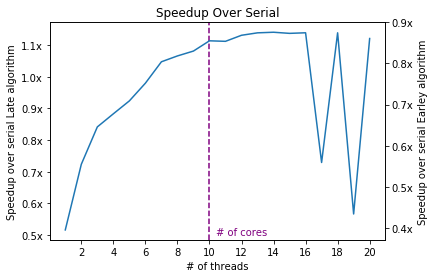

In [233]:
speedup_plot(java_df, '../earley_paper/figures/java_scaling.png')

In [234]:
cgw_df = pd.read_csv('results/cgw.csv', header=None, skiprows=1, names=['name', 'avg', 'tot', 'ct', 'cores', 'size'])
cgw_df

,name,avg,tot,ct,cores,size
0,late_parallel,11.34280,11.34280,1,1,3236409
1,late_parallel,5.12368,5.12368,1,2,3236409
2,late_parallel,3.64926,3.64926,1,3,3236409
3,late_parallel,3.10810,3.10810,1,4,3236409
4,late_parallel,2.59748,2.59748,1,5,3236409
5,late_parallel,2.42450,2.42450,1,6,3236409
6,late_parallel,2.01878,2.01878,1,7,3236409
7,late_parallel,1.90137,1.90137,1,8,3236409
8,late_parallel,1.90010,1.90010,1,9,3236409
9,late_parallel,1.66803,1.66803,1,10,3236409


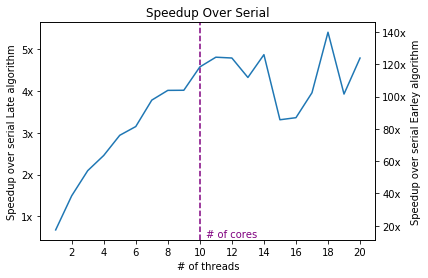

In [235]:
speedup_plot(cgw_df, '../earley_paper/figures/cgw_scaling.png')